# Importing Libraries required for this notebook

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data from url

In [18]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [20]:
data.shape

(25, 2)

# Plotting the distribution of scores

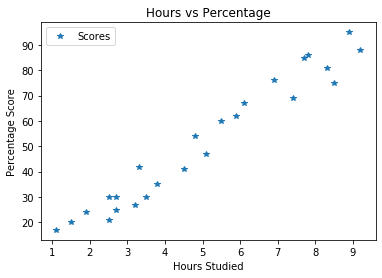

In [24]:
data.plot(x='Hours', y='Scores', style='*')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [25]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [28]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [29]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

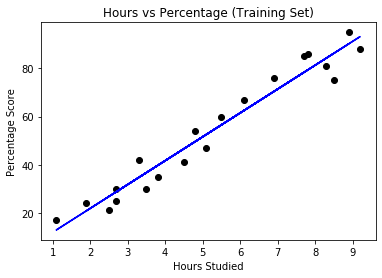

In [33]:
plt.scatter(X_train,y_train,color='black')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Hours vs Percentage (Training Set)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

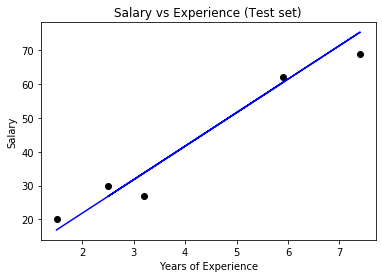

In [34]:
plt.scatter(X_test, y_test, color = 'black')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [35]:
regressor.score(X_train,y_train)

0.9515510725211553

In [36]:
regressor.score(X_test,y_test)

0.9454906892105356

# Making predictions

In [38]:
y_pred = regressor.predict(X_test)

In [39]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [40]:
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Evaluating the model

In [42]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))

In [48]:
rms

4.6474476121003665